In [2]:
!pip install ipython-autotime

%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=2467b02ac81f371fba78a3acf2d3e7cf48af307e80954ddef712ba5a668924d2
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [3]:
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift
from skimage.feature import hog

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from PIL import Image

from google.colab.patches import cv2_imshow
import os


time: 1.7 s


In [5]:
!unzip -q -n "/content/drive/My Drive/Individual_Component.zip" 

time: 34.2 s


In [0]:
Xtest=[]
Ytest=[]
Xtrain=[]
Ytrain=[]
rootdir="/content/Individual_Component/"
for subdir, dirs, files in os.walk(rootdir):
  for file in files:
    if file.endswith(".pnm"):
      if 'train' in subdir:
        if 'positive' in subdir:
          img=cv2.imread(os.path.join(subdir, file),0)
          fd, _ = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
          Xtrain.append(fd)
          Ytrain.append(1)
          
        elif 'negative' in subdir:
          img=cv2.imread(os.path.join(subdir, file),0)
          fd, _ = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
          Xtrain.append(fd)
          Ytrain.append(0)      

      elif 'test' in subdir:
        if 'positive' in subdir:
          img=cv2.imread(os.path.join(subdir, file),0)
          fd, _ = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
          Xtest.append(fd)
          Ytest.append(1)

        elif 'negative' in subdir:
          img=cv2.imread(os.path.join(subdir, file),0)
          fd, _ = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
          Xtest.append(fd)
          Ytest.append(0)
          

X_train=np.array(Xtrain)
y_train=np.array(Ytrain)       
X_test=np.array(Xtest)
y_test=np.array(Ytest)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72114, 2268), (9457, 2268), (72114,), (9457,))

time: 21min 3s


In [0]:
np.savez("/content/drive/My Drive/ind_data.npz" , X_train, y_train,X_test,y_test)

time: 7.04 s


In [4]:
npzfile = np.load("/content/drive/My Drive/ind_data.npz")

X_train, y_train, X_test, y_test =npzfile.f.arr_0,npzfile.f.arr_1,npzfile.f.arr_2,npzfile.f.arr_3


time: 17.2 s


In [6]:
cv2.imread("/content/Individual_Component/test/test_negative/00000000/item_00000001.pnm",0).shape

(80, 64)

time: 25.4 ms


In [0]:


clf=LinearSVC(max_iter=10000)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("Accuracy: ",accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))


dtcclf=DecisionTreeClassifier()

dtcclf = dtcclf.fit(X_train, y_train)
y_pred = dtcclf.predict(X_test)


print("Accuracy: ",accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))




SGDClassifierclf=SGDClassifier()

SGDClassifierclf = SGDClassifierclf.fit(X_train, y_train)
y_pred = SGDClassifierclf.predict(X_test)


print("Accuracy: ",accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy:  0.984032991434916


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6000
           1       0.98      0.98      0.98      3457

    accuracy                           0.98      9457
   macro avg       0.98      0.98      0.98      9457
weighted avg       0.98      0.98      0.98      9457

Accuracy:  0.9240774029819182


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6000
           1       0.90      0.90      0.90      3457

    accuracy                           0.92      9457
   macro avg       0.92      0.92      0.92      9457
weighted avg       0.92      0.92      0.92      9457

Accuracy:  0.9819181558633816


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6000
           1       0.99      0.96      0.97      3457

    accuracy                           0.98      9457
   macro avg       0.98      0.98

In [0]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((72114, 2268), (9457, 2268), (72114,), (9457,))

time: 3.35 ms


Accuracy:  0.9860420852278735


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6000
           1       0.98      0.98      0.98      3457

    accuracy                           0.99      9457
   macro avg       0.99      0.98      0.98      9457
weighted avg       0.99      0.99      0.99      9457



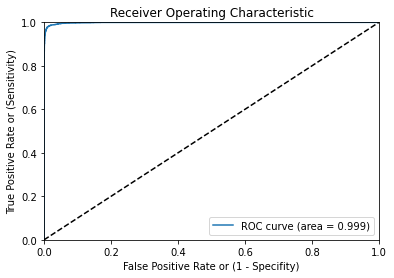

time: 2h 59min 29s


In [0]:

SVCclf=SVC(kernel='linear',probability=True,gamma='auto')

SVCclf = SVCclf.fit(X_train, y_train)
y_pred = SVCclf.predict(X_test)


print("Accuracy: ",accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred,))

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, SVCclf.predict_proba(X_test)[:,1])
roc_auc =  auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [0]:


clf=LinearSVC(max_iter=20000)
y_margins = clf.fit(X_train, y_train).decision_function(X_test)
y_pred = clf.predict(X_test)
y_prob = (y_margins - y_margins.min()) / (y_margins.max() - y_margins.min())

print("Accuracy: ",accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))





Accuracy:  0.984032991434916


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6000
           1       0.98      0.98      0.98      3457

    accuracy                           0.98      9457
   macro avg       0.98      0.98      0.98      9457
weighted avg       0.98      0.98      0.98      9457

time: 1min 1s


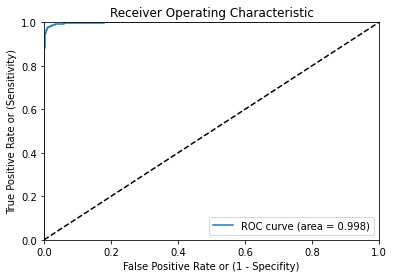

time: 199 ms


In [0]:
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, clf.decision_function(X_test))
roc_auc =  auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [0]:
fpr, tpr

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.66666667e-04,
        1.66666667e-04, 3.33333333e-04, 3.33333333e-04, 5.00000000e-04,
        5.00000000e-04, 6.66666667e-04, 6.66666667e-04, 8.33333333e-04,
        8.33333333e-04, 1.00000000e-03, 1.00000000e-03, 1.16666667e-03,
        1.16666667e-03, 1.33333333e-03, 1.33333333e-03, 1.50000000e-03,
        1.50000000e-03, 1.66666667e-03, 1.66666667e-03, 1.83333333e-03,
        1.83333333e-03, 2.00000000e-03, 2.00000000e-03, 2.16666667e-03,
        2.16666667e-03, 2.33333333e-03, 2.33333333e-03, 2.66666667e-03,
        2.66666667e-03, 2.83333333e-03, 2.83333333e-03, 3.00000000e-03,
        3.00000000e-03, 3.16666667e-03, 3.16666667e-03, 3.33333333e-03,
        3.33333333e-03, 3.50000000e-03, 3.50000000e-03, 3.66666667e-03,
        3.66666667e-03, 4.16666667e-03, 4.16666667e-03, 4.50000000e-03,
        4.50000000e-03, 4.66666667e-03, 4.66666667e-03, 5.00000000e-03,
        5.00000000e-03, 5.33333333e-03, 5.33333333e-03, 5.500000

time: 6.27 ms
